In [1]:
%cd D:\IIT tutorials\2nd year\CS-521\assignment 3
load_first_time = False
lfw_dataset = None

D:\IIT tutorials\2nd year\CS-521\assignment 3


#### Change load_first_time to true if you are downloading the data for the first time, and change the directory where you want the data and images to be stored

# Importing the required libraries

In [2]:
import sklearn
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
import numpy as np
import pickle
%matplotlib inline

# Storing the data
Since downloading the data each time the notebook is not feasible, I download the data while running the notebook for the first time and store it in a pickle file.

In [3]:
if(load_first_time == True):
    lfw_dataset = fetch_lfw_people(min_faces_per_person=100)
    load_first_time = False
    pickle_out = open("lfw_data.pkl","wb")
    pickle.dump(lfw_dataset,pickle_out)
    pickle_out.close()
else:
    pickle_in = open("lfw_data.pkl","rb")
    lfw_dataset = pickle.load(pickle_in)

In [4]:
lfw_df = pd.DataFrame(lfw_dataset['data'])
lfw_target = pd.DataFrame(lfw_dataset['target'])

In [5]:
target_names = lfw_dataset['target_names']

StandardScaler is used to apply Z transform to our data

In [6]:
scaler = StandardScaler()
scaled_lfw_df = scaler.fit_transform(lfw_df)

I now apply PCA to reduce the dimensions from 2914 to 100.

In [7]:
pca = PCA(n_components = 100)
lfw_Z = pca.fit_transform(scaled_lfw_df)

In [8]:
print("Shape of original data: {}".format(lfw_df.shape))
print("Shape of data after applying PCA: {}".format(lfw_Z.shape))

Shape of original data: (1140, 2914)
Shape of data after applying PCA: (1140, 100)


### Splitting the data into train and test sets

In [9]:
train_X,test_X,train_y,test_y = train_test_split(lfw_Z,lfw_target,test_size = 0.3)

In [10]:
X_embedded = pd.DataFrame(TSNE(n_components = 2).fit_transform(lfw_Z))
X_embedded["target"] = lfw_target
print(X_embedded.shape)

(1140, 3)


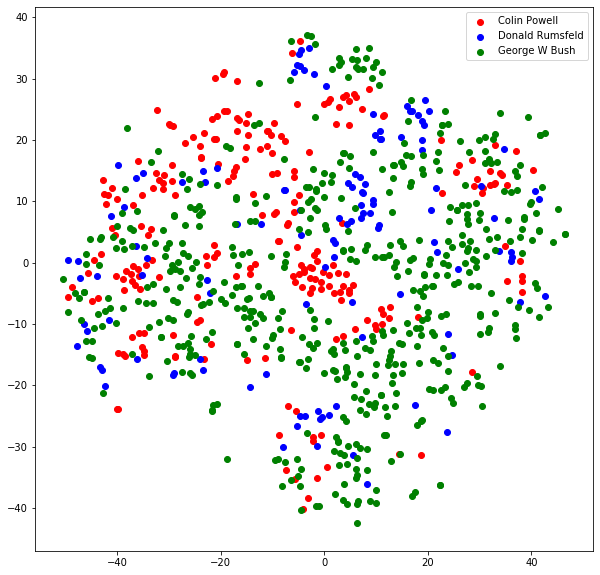

In [11]:
groups = X_embedded.groupby("target")
fig,ax = plt.subplots(figsize = (10,10))
color = ['red','blue','green']
for epoch,(name,group) in enumerate(groups):
    if(epoch == 3):
        break
    ax.scatter(group[0],group[1],color = color[epoch],label = target_names[epoch])
ax.legend()
fig.savefig("q1 images/q1 tsne 2D.png")
plt.show()

## Fitting the data using a Nearest neighbor classifier and generating its classification report

In [12]:
nbrs =KNeighborsClassifier(n_neighbors = 1)
nbrs.fit(train_X,train_y.values.ravel())
pred = nbrs.predict(test_X)
test_true = test_y.values.ravel()
report = classification_report(test_true,pred,target_names = target_names,output_dict = True)
report = pd.DataFrame(report).transpose()

In [13]:
report

,precision,recall,f1-score,support
Colin Powell,0.737705,0.584416,0.652174,77.000000
Donald Rumsfeld,0.346939,0.485714,0.404762,35.000000
George W Bush,0.745562,0.768293,0.756757,164.000000
Gerhard Schroeder,0.160000,0.190476,0.173913,21.000000
Tony Blair,0.526316,0.444444,0.481928,45.000000
accuracy,0.619883,0.619883,0.619883,0.619883
macro avg,0.503304,0.494669,0.493907,342.000000
weighted avg,0.638195,0.619883,0.625237,342.000000


# Plotting the eigenfaces
I store the height and width of each image in the variables ht and wd respectively. 

Then, I reshape the components of pca to convert the 1D array of each image into a 2D array so that the eigenface can be plotted.

plot_im is a helper function which is used to plot figures that are passed as a parameter. These figures have dimensions (ht,wd).

In [14]:
__ ,ht,wd = lfw_dataset.images.shape
eigenfaces = pca.components_.reshape((100,ht,wd)) 

In [15]:
def plot_im(data,ht,wd,rg):
    if(rg == -1):
        rg = len(data)
    for i in range(rg):
        fig,ax = plt.subplots()
        plt.imshow(data[i].reshape(ht,wd),cmap = plt.cm.gray)
        plt.title("eigenface "+str(i+1))
        plt.show()
        fig.savefig("q1 images/eigenface"+str(i)+".png")

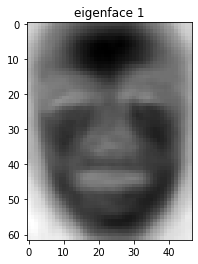

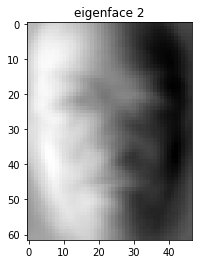

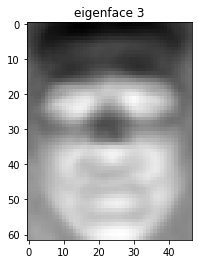

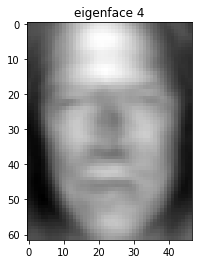

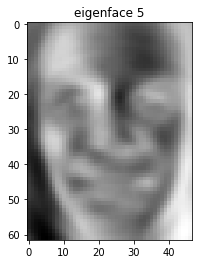

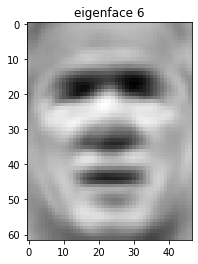

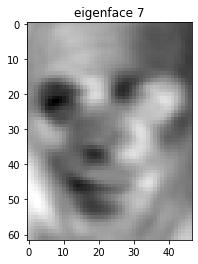

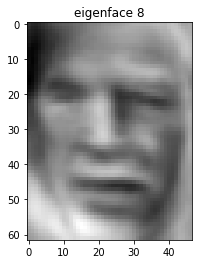

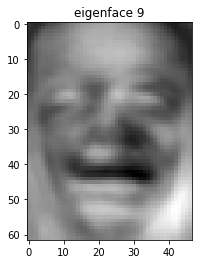

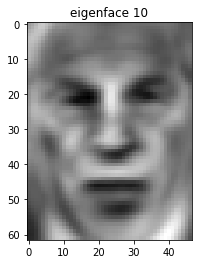

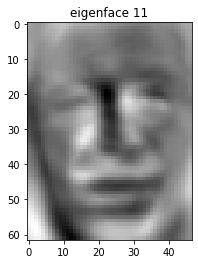

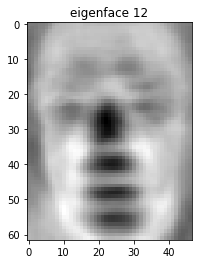

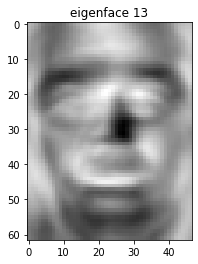

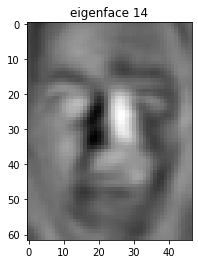

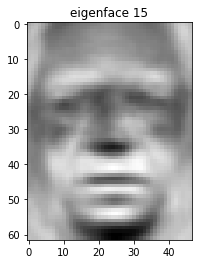

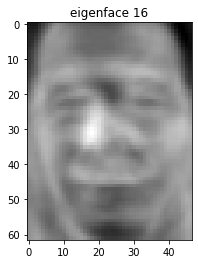

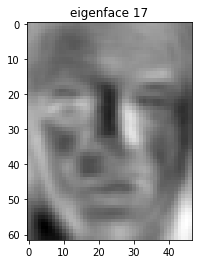

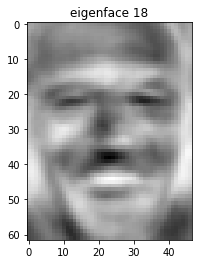

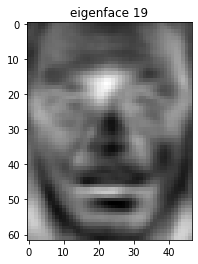

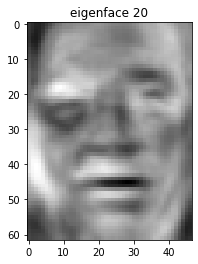

In [16]:
plot_im(eigenfaces,ht,wd,20)

### Now we apply PCA such that 80% of variance of the original data is retained.

In [17]:
new_pca = PCA(n_components = 0.8,svd_solver = 'full')
new_embedded_x = new_pca.fit_transform(scaled_lfw_df)

In [18]:
print("Number of eigenfaces required to explain 80% of variance in the data = {}".format(new_pca.components_.shape[0]))

Number of eigenfaces required to explain 80% of variance in the data = 31


In [19]:
new_train_X,new_test_X,new_train_y,new_test_y = train_test_split(new_embedded_x,lfw_target,test_size = 0.3)

In [20]:
nbrs.fit(new_train_X,new_train_y.values.ravel())
pred = nbrs.predict(new_test_X)
test_true = new_test_y.values.ravel()
new_report = classification_report(test_true,pred,target_names = target_names,output_dict = True)
new_report = pd.DataFrame(new_report).transpose()

In [21]:
new_report

,precision,recall,f1-score,support
Colin Powell,0.647059,0.586667,0.615385,75.000000
Donald Rumsfeld,0.370370,0.500000,0.425532,40.000000
George W Bush,0.691781,0.721429,0.706294,140.000000
Gerhard Schroeder,0.379310,0.354839,0.366667,31.000000
Tony Blair,0.533333,0.428571,0.475248,56.000000
accuracy,0.584795,0.584795,0.584795,0.584795
macro avg,0.524371,0.518301,0.517825,342.000000
weighted avg,0.590114,0.584795,0.584903,342.000000
